In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [71]:
df = pd.read_csv('Diamonds Prices2022.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [83]:
#Extract relevant columns
X = df[['carat']].values  #Predictor
y = df['price'].values #Target


In [85]:
#Split the dataset into training and testing dataset
X_train,X_test,Y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [87]:
#Fit the llinear Regression Model
model = LinearRegression()
model.fit(X_train,Y_train)
#make predictions on the test set
y_pred = model.predict(X_test)

In [89]:
#Metrics and Interpretation
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 =r2_score(y_test,y_pred)

In [91]:
print("model Coefficients")
print(f" Slope (Coefficient for Carat):  {model.coef_[0]}")
print(f" Intercept : {model.intercept_}")
print(f"\nModel Performance Metrics")
print(f" Mean Squared Error (MSE) {mse}")
print(f"Root  Mean Squared Error (RMSE) {rmse}")
print(f"R^2  Score (Explained Variance) : {r2}")

model Coefficients
 Slope (Coefficient for Carat):  7751.989281984838
 Intercept : -2247.424167881497

Model Performance Metrics
 Mean Squared Error (MSE) 2315697.6330710365
Root  Mean Squared Error (RMSE) 1521.7416446529405
R^2  Score (Explained Variance) : 0.8516827702293546


In [93]:
#Print predicted vs actual values for the test set
print("\nPredicted vs actual prices (Test set):")
for actual,predicted in zip(y_test,y_pred):
    print(f" Actual : {actual:.2f} , Predicted : {predicted:.2f}")


Predicted vs actual prices (Test set):
 Actual : 559.00 , Predicted : -386.95
 Actual : 8403.00 , Predicted : 7132.48
 Actual : 1238.00 , Predicted : 1628.57
 Actual : 1243.00 , Predicted : 1628.57
 Actual : 6901.00 , Predicted : 9768.16
 Actual : 3011.00 , Predicted : 5504.57
 Actual : 1766.00 , Predicted : 1706.09
 Actual : 12958.00 , Predicted : 9535.60
 Actual : 2103.00 , Predicted : 2171.21
 Actual : 4789.00 , Predicted : 6589.84
 Actual : 14618.00 , Predicted : 9380.56
 Actual : 702.00 , Predicted : 233.21
 Actual : 958.00 , Predicted : 155.69
 Actual : 2401.00 , Predicted : 3178.97
 Actual : 1149.00 , Predicted : 2481.29
 Actual : 961.00 , Predicted : 930.89
 Actual : 2958.00 , Predicted : 5349.53
 Actual : 666.00 , Predicted : 310.73
 Actual : 2665.00 , Predicted : 3721.61
 Actual : 9875.00 , Predicted : 9923.20
 Actual : 1020.00 , Predicted : 233.21
 Actual : 2553.00 , Predicted : 3178.97
 Actual : 625.00 , Predicted : 155.69
 Actual : 10367.00 , Predicted : 7054.96
 Actual :

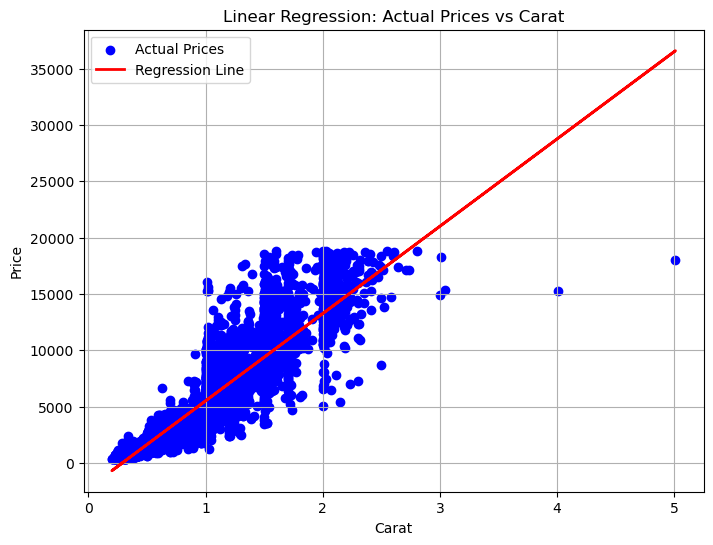

In [95]:
#Plot the linear regression line and Actual values
plt.figure(figsize=(8,6))
plt.scatter(X_test,y_test,color='blue',label='Actual Prices')
plt.plot(X_test,y_pred,color='red',linewidth=2,label="Regression Line")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Linear Regression: Actual Prices vs Carat")
plt.legend()
plt.grid()
